## Mission

La mission est d’aider les équipes de l'entreprise brésilienne Olist à comprendre ses différents types d'utilisateurs. L'idée est d'utiliser des méthodes non supervisées pour regrouper des clients de profils similaires.
Il faut donc fournir à l’équipe Marketing d'Olist une description actionable de segmentation et la logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

#### [Importation des différents datasets](#importation-donnees)
 - [Customers](#customers)
 - [Geolocation](#geolocation)
 - [Order items](#order-items)
 - [Order payments](#order-payments)
 - [Order reviews](#order-reviews)
 - [Orders](#orders)
 - [Products](#products)
 - [Sellers](#sellers)
 - [Product category name translation](#product-category-name-translation)
 - [Résumé des datasets](#resume-datasets)


#### [Création d'un dataset étendu à partir des commandes](#création-dun-dataset-étendu-à-partir-des-commandes)
 - [Jointure entre order_items et orders](#jointure-entre-order_items-et-orders)
 - [Filtre des commandes non livrées](#filtre-des-commandes-non-livrées)
 - [Répartition des commandes sur la durée du dataset)](#répartition-des-commandes-sur-la-durée-du-dataset)
 - [Nombre de commandes par mois, jour de la semaine, heure](#nombre-de-commandes-par-mois-jour-heure)
 - [Boxplot des chiffres d'affaires en fonction du mois](#boxplot)
 - [Création des colonnes duration_delivery et difference_real_estimated_delivery](#creation-duration)

 #### [Satisfaction: ajout de order_reviews](#satisfaction-ajout-de-order_reviews)
 - [Création de number_reviews: nombre de commentaires par commande](#creation-number-reviews)
 - [Répartition du score attribué aux commandes](#répartition-des-scores-attribués-aux-commandes)
 - [Scatter plots: scores de satisfaction par rapport au temps de livraison réel, et à la différence réel - estimé](#scatter-plots-scores-de-satisfaction-par-rapport-au-temps-de-livraison-réel-et-à-la-différence-réel---estimé)

#### [Ajout des modalités de paiement](#ajout-des-modalités-de-paiement)
 - [Répartition des moyens de paiement par commande](#répartitions-des-moyens-de-paiement-par-commande)

#### [Ajout des produits](#ajout-des-produits)
 - [Jointure avec la traduction en anglais des types de produit](#jointure-avec-la-traduction-en-anglais-des-types-de-produits)
 - [Distribution des catégories de produits](#distribution-des-catégories-de-produits)
 - [Jointure avec le dataset products](#jointure-avec-le-dataset-products)
 - [Feature engineering: simplification des types de produits](#feature-engineering-simplification-des-types-de-produits)
 - [Répartition des catégories de produits](#répartition-des-catégories-de-produits)

#### [Ajout des localisations](#ajout-des-localisations)
 - [Jointure avec le dataset customers](#jointure-avec-le-dataset-customers)
 - [Jointure avec le dataset sellers](#jointure-avec-le-dataset-sellers)
 - [Distance Haversine entre le vendeur et l'acheteur](#distance-haversine-entre-le-vendeur-et-lacheteur)


#### [Récence, Fréquence, Montant](#récence-fréquence-montant)



<a id='importation-donnees'></a>
### Importation des différents datasets

#### Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

customers = pd.read_csv("olist/olist_customers_dataset.csv")
customers.shape


(99441, 5)

In [2]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
98709,a801360fcad89119ab97d96f5818e379,9ff2179ba2c564188e00d0de93023e15,6150,osasco,SP
51715,6e0cfceb2d49f48738767d48272a8ea8,4c2fca8629c137347d177109a9a755bc,58701,patos,PB
15406,dcc865b0a392f4d72458ec0677e1f085,0f95258527026365d80664a88544bdbb,33115,santa luzia,MG
30476,93c614a0e7397b6bf4173f3c62cc0c87,cea24d7104b107365c53eb0cc5c4eb66,81820,curitiba,PR
93599,95306421a0aa01b3d9c6ade87d80313d,b6669bf46b4633cd119e3ad6b4426c3d,9230,santo andre,SP


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


En résumé, customers: id, zip code, ville, état...

#### Geolocation

In [4]:
geolocation = pd.read_csv("olist/olist_geolocation_dataset.csv")
geolocation.shape

(1000163, 5)

In [5]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
672491,40352,-12.941292,-38.477888,salvador,BA
985342,97095,-29.701118,-53.772068,santa maria,RS
763503,66063,-1.454341,-48.468980,belem,PA
859722,83005,-25.538509,-49.196763,sao jose dos pinhais,PR
813959,76825,-8.744528,-63.847299,porto velho,RO


In [6]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


En résumé, geolocation: latitude, longitude, ville, état, zip code

#### Order Items

In [7]:
order_items = pd.read_csv("olist/olist_order_items_dataset.csv")
order_items.shape

(112650, 7)

In [8]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
942,02332b54c758506809fd87d9c2748086,1,4100a608bd0aa524b06ffefba973707b,2a61c271b1ac763450d846849783e922,2017-11-10 13:07:08,32.99,21.15
24822,388a9117213936e0290e6e7d50f9fee0,1,4fcb3d9a5f4871e8362dfedbdb02b064,8581055ce74af1daba164fdbd55a40de,2017-05-10 21:15:15,143.80,17.64
97937,de28e8b3c44bdad3ecda851978e1599c,1,7c4dcc33f7e49dc0d25078b036baa162,7142540dd4c91e2237acb7e911c4eba2,2017-10-24 11:56:36,59.90,17.67
8845,143a94013dbe03feb57f03420bd2bd15,1,d315b738a6e96f4d9710af966cb7cd5b,f8db351d8c4c4c22c6835c19a46f01b0,2018-07-24 20:50:13,26.90,7.45
16412,258fdca015115622abad4d8ac1a13ae4,1,5b7c8200bab71ae7cc1a0a7073b6afa1,dbc22125167c298ef99da25668e1011f,2018-01-15 20:37:24,40.90,17.92


In [9]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


En résumé, order items: order_id, product_id, seller_id, prix, taxes ...

#### Order Payments

In [10]:
order_payments = pd.read_csv("olist/olist_order_payments_dataset.csv")
order_payments.shape

(103886, 5)

In [11]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
32087,5d9aa8310b11548297163fbfa1f78184,1,credit_card,6,67.22
19936,0cb67a1f07ecacac318a6eb35cf4928f,1,credit_card,1,62.15
78276,9cb058ec33cf6725b0fc1cf24525af9c,1,credit_card,4,318.05
53944,906a6b0a96d89ee226e4977e99b80b9e,1,credit_card,1,91.96
26741,0ebc490cadb55779894fe2a498e64439,1,credit_card,10,338.27


In [12]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


En résumé, order_payments: order_id, prix, type paiement, nb versements...

#### Order Reviews

In [13]:
order_reviews = pd.read_csv("olist/olist_order_reviews_dataset.csv")
order_reviews.shape

(99224, 7)

In [14]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
78214,2536536d7a57a6f7d457de0b6c8191b3,f3d59d2aeafa9e69103f4dbad2b5ec46,4,NaN,NaN,2018-01-30 00:00:00,2018-01-30 20:15:47
8386,569106620fcb046a5047cc889705317c,33550c45cf1fd94c9f755293fb9591c0,5,NaN,NaN,2017-12-07 00:00:00,2017-12-10 00:27:21
55686,27f6ba74fac67e2701377840651d3dcf,34aed6e4313d7573b0d3b459f3a805ea,4,NaN,NaN,2017-11-15 00:00:00,2017-11-16 00:10:42
90921,90e42703cf78bf3683c54f20b2ade3c3,028116828b6e9f2b8070f1c4f66c68f0,5,NaN,NaN,2017-12-02 00:00:00,2017-12-03 14:47:36
10818,d75f79cfb2ba451e610ce47df71dfccb,dd103933801d1fccfa8cf84150eae10a,5,NaN,"gostei chegou no prazo, preço bom",2018-01-17 00:00:00,2018-01-18 12:05:01


In [15]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


En résumé, order_reviews: order_id, avis titre, avis message...

#### Orders

In [16]:
orders = pd.read_csv("olist/olist_orders_dataset.csv")
orders.shape

(99441, 8)

In [17]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
83499,df0fc2525c393ef5bcd58db7516a0fcb,6f7e4eda4a91a18114c7ae6458f4068b,delivered,2018-05-06 10:06:00,2018-05-06 10:30:49,2018-05-07 09:08:00,2018-05-15 21:07:42,2018-05-30 00:00:00
28242,7bf279350473c54b5d435d700ee6af2e,26c41ae59ad5b339b1a33a20b210af68,delivered,2017-11-29 03:33:53,2017-11-29 03:53:37,2017-11-29 15:03:23,2017-12-07 18:09:50,2017-12-20 00:00:00
24442,72f73037e114c82d0b49a74b4d7532a4,7a2f3fea8b2d7476c6c3e1ce334c4d57,delivered,2018-01-05 17:05:46,2018-01-06 02:08:00,2018-01-09 17:05:45,2018-01-16 14:55:18,2018-02-02 00:00:00
7510,ae25aaffc9b89e8519bb9b5aa59cc8ef,e5245a61cf63870720b6559bad5d35e8,delivered,2017-01-24 12:18:07,2017-01-24 12:25:27,2017-01-26 10:34:58,2017-02-08 15:15:04,2017-03-03 00:00:00
6037,39dab0c9ea1c7c66a1a516423f50c97a,33f7e823808ce786ac284e32b07cf6e4,delivered,2017-05-08 17:51:05,2017-05-09 09:45:19,2017-05-12 14:17:02,2017-05-22 14:33:18,2017-06-12 00:00:00


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


En résumé, orders: order_id, acheteur id, date achat, date livraison... 

#### Products

In [19]:
products = pd.read_csv("olist/olist_products_dataset.csv")
products.shape

(32951, 9)

In [20]:
products['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [21]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2582,3264eb8097906cea4af2f4a56e2447ed,relogios_presentes,57.0,723.0,5.0,200.0,16.0,2.0,11.0
27930,e888edddeb449bde570d695c62b27b26,informatica_acessorios,60.0,501.0,1.0,300.0,16.0,16.0,16.0
3682,fb9b26e56f7f624662ef9df82889f63d,fashion_bolsas_e_acessorios,29.0,830.0,1.0,50.0,16.0,5.0,16.0
6609,1d722f14297e49c1db0545e1f7ec764f,moveis_decoracao,45.0,2047.0,1.0,1700.0,46.0,19.0,15.0
12690,97fd40ea17a0e785880ce09373b2900a,moveis_decoracao,46.0,1246.0,1.0,1200.0,54.0,8.0,11.0


In [22]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


En résumé, products: product_id, categorie, taille, poids...

#### Sellers

In [23]:
sellers = pd.read_csv("olist/olist_sellers_dataset.csv")
sellers.shape

(3095, 4)

In [24]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1674,2c3d56f92f360fb89d849b84e8f50eae,6420,barueri,SP
1506,98e164d549402270247f3c96a1a158ef,5083,sao paulo,SP
2686,e5e33c0d8e7e002f398f5dc4cbbb338f,17032,bauru,SP
1830,30a81d8cf85fb2ada1b1b094c9583a95,3563,sao paulo,SP
1775,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP


In [25]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


En résumé, sellers: seller_id, zipcode, ville, état

#### Product category name translation

In [26]:
product_category_name_translation = pd.read_csv("olist/product_category_name_translation.csv")
product_category_name_translation.shape

(71, 2)

In [27]:
product_category_name_translation.sample(5)

,product_category_name,product_category_name_english
43,construcao_ferramentas_iluminacao,construction_tools_lights
58,bebidas,drinks
59,cine_foto,cine_photo
52,sinalizacao_e_seguranca,signaling_and_security
49,construcao_ferramentas_seguranca,construction_tools_safety


In [28]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


En résumé, product_category_name_translation: nom produit portugais, nom produit anglais

<a id='resume-datasets'></a>
#### Résumé des datasets

**<font color="#1ade9e">customers</font>**: customer_id, zip code, ville, état...  
**<font color="#1ade9e">geolocation</font>**: latitude, longitude, ville, état, zip code  
**<font color="#1ade9e">order_items</font>**: order_id, product_id, seller_id, prix, taxes ...  
**<font color="#1ade9e">order_payments</font>**: order_id, prix, type paiement, nb versements...  
**<font color="#1ade9e">order_reviews</font>**: order_id, avis titre, avis message...  
**<font color="#1ade9e">orders</font>**: order_id, customer_id, date achat, date livraison...  
**<font color="#1ade9e">products</font>**: product_id, categorie, taille, poids...  
**<font color="#1ade9e">sellers</font>**: seller_id, zipcode, ville, état  
**<font color="#1ade9e">product_category_name_translation</font>**: nom produit portugais, nom produit anglais  

<a id='creation-datasets'></a>
### Création d'un dataset étendu à partir des commandes 

#### Jointure entre order_items et orders

In [29]:
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

order_items_to_delete = ["shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date"]
order_items.drop(order_items_to_delete,
                 axis=1,
                 inplace=True)
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
83987,becf90dbbea6e1a229814dab50912be4,1,5d790355cbeded0cd60e25cbc4c527a2,229c3efbfb0ea2058de4ccdfbc3d784a,97.00,8.93,1b9b8bd7c25bb78a4a5fb5c9101dc6e4,delivered,2017-05-08 18:53:05,2017-05-13 11:22:40,2017-05-31 00:00:00
32918,4a987097277f21bd90f8d6e50af76593,1,c6f91a747904e6f2a5164c862c3b6633,f214d28e8d8e3ef068748498ccc2f813,24.99,22.11,b29693f7db88126b2b3dc47b54ab7d7f,delivered,2018-08-12 23:25:26,2018-08-21 16:42:58,2018-09-10 00:00:00
103957,ec1d3a645b2a221446df31f1dcbda3e2,1,28a652ff04e43c1bc57937a9f8770f9b,3d871de0142ce09b7081e2b9d1733cb1,139.00,27.52,c0b14a9776882d6ae80ac4db31ef2172,delivered,2018-01-11 19:50:54,2018-01-21 12:24:44,2018-02-06 00:00:00
44427,64f30c3979fdd4ceb17f8c398d2806f9,2,0aa889132d2e6b79778488c79d025d99,e62b2d6ac10570a035a30bafcf01d263,52.00,9.91,1236cc216e0d5232fc35a2f838f03136,delivered,2018-01-18 12:53:15,2018-01-26 18:14:18,2018-02-05 00:00:00
98705,dfdf713f169a1ba9bbfd41f67179e07a,1,a040c0e88511c8c58db44fd6831cdb45,113e3a788b935f48aad63e1c41dac1bd,12.52,12.79,2946b54f698c047983290dd6af2e1b4e,delivered,2018-04-02 21:36:47,2018-04-07 12:51:54,2018-04-20 00:00:00


#### Filtre des commandes non livrées

In [30]:
order_status_counts = order_items["order_status"].value_counts()
order_status_counts

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

**delivered**: livré  
**shipped**: expédié  
**canceled**: annulé  
**invoiced**: facturé  
**processing**: en cours de traitement  
**unavailable**: non disponible  
**approved**:  approuvé  
  
On ne s'intéressera qu'aux commandes livrées, on conserve seulement le statut **delivered**.  

In [31]:
order_items = order_items[order_items["order_status"] == "delivered"]

In [32]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   product_id                     110197 non-null  object 
 3   seller_id                      110197 non-null  object 
 4   price                          110197 non-null  float64
 5   freight_value                  110197 non-null  float64
 6   customer_id                    110197 non-null  object 
 7   order_status                   110197 non-null  object 
 8   order_purchase_timestamp       110197 non-null  object 
 9   order_delivered_customer_date  110189 non-null  object 
 10  order_estimated_delivery_date  110197 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.1+ MB


#### Répartition des commandes sur la durée du dataset

Conversion des dates (object) en dates (datetime64[ns])

In [33]:
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   price                          110197 non-null  float64       
 5   freight_value                  110197 non-null  float64       
 6   customer_id                    110197 non-null  object        
 7   order_status                   110197 non-null  object        
 8   order_purchase_timestamp       110197 non-null  datetime64[ns]
 9   order_delivered_customer_date  110189 non-null  datetime64[ns]
 10  order_estimated_delivery_date  110197 non-null  datetime64[ns]
dtypes: da

Première et dernière commandes du dataset

In [34]:
min_timestamp = order_items['order_purchase_timestamp'].min()
max_timestamp = order_items['order_purchase_timestamp'].max()

print("Date et heure d'achat minimale:", min_timestamp)
print("Date et heure d'achat maximale:", max_timestamp)

Date et heure d'achat minimale: 2016-09-15 12:16:38
Date et heure d'achat maximale: 2018-08-29 15:00:37


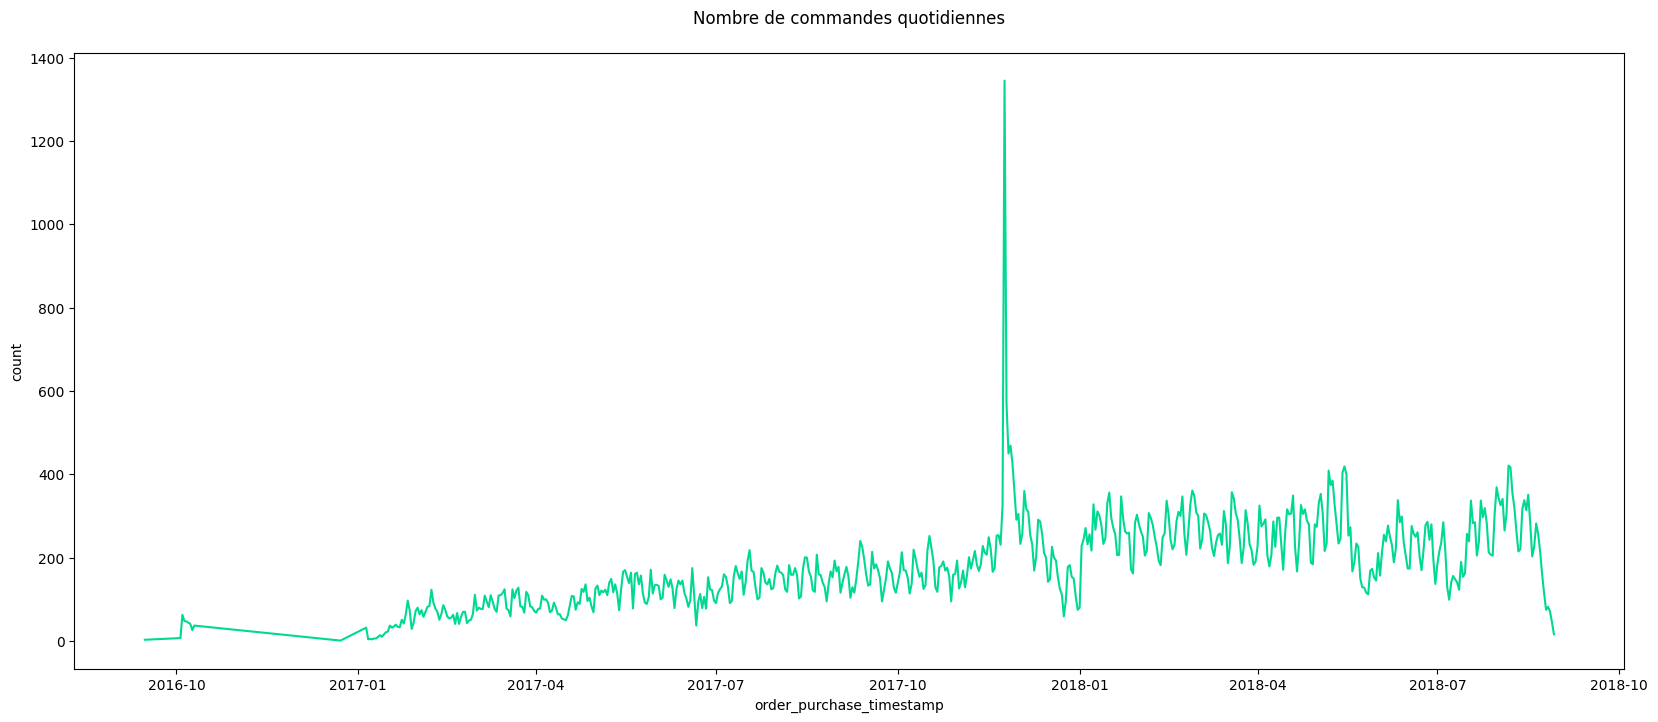

In [35]:
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"]\
                                      .dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Nombre de commandes quotidiennes\n")
plt.show()

#### Nombre de commandes par mois, jour, heure.

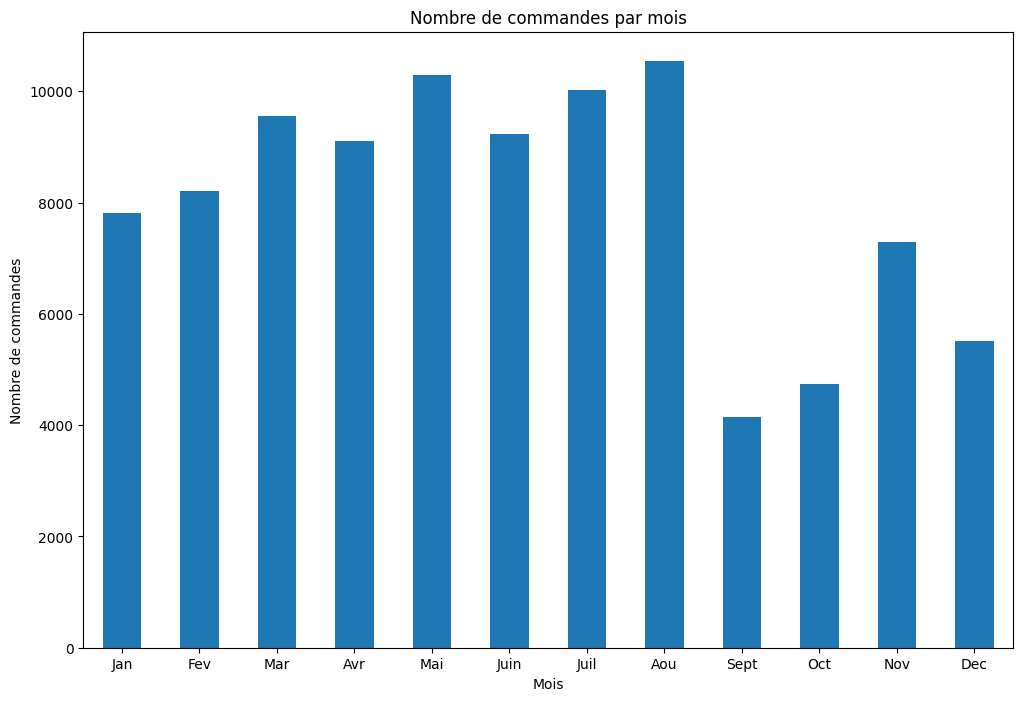

In [36]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Nombre de commandes par mois",
          ylabel="Nombre de commandes",
          xlabel="Mois",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Fev','Mar','Avr','Mai','Juin',
                             'Juil','Aou','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

On ne retrouve pas le nombre de commandes élevés liées aux fêtes de fin d'année dans la répartition mensuelle.  
Les mois d'août et mai sont les mois avec le plus de commmandes.

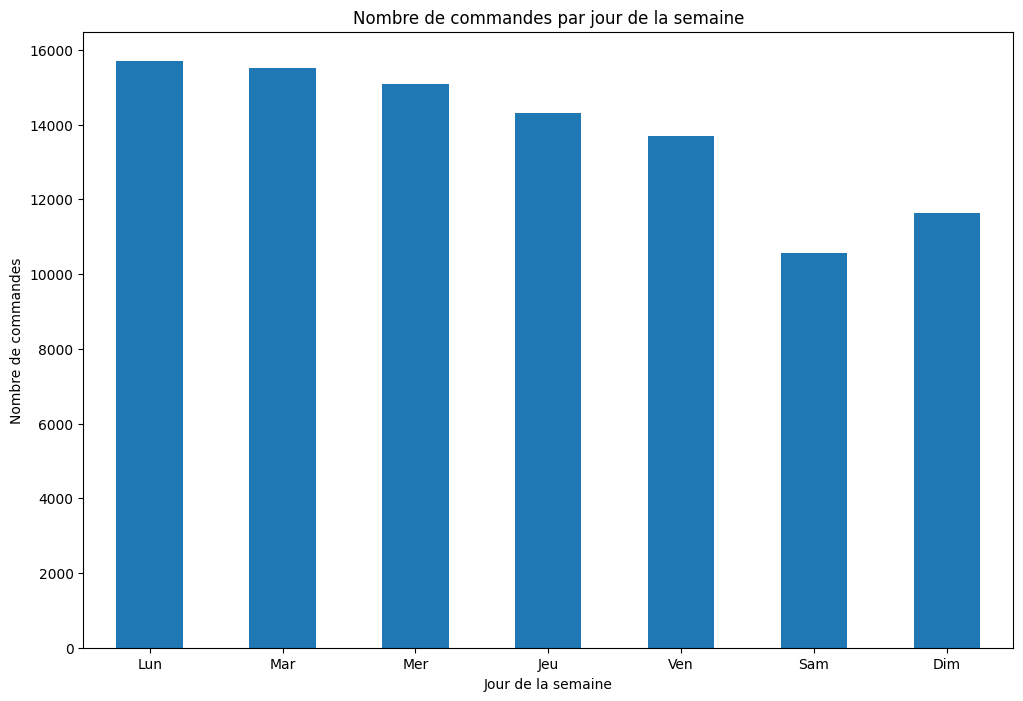

In [37]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Nombre de commandes par jour de la semaine",
          ylabel="Nombre de commandes",
          xlabel="Jour de la semaine",
          legend=False)
plt.xticks(np.arange(0,7), ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'], rotation='horizontal')
plt.show()

Le nombre de commandes est plus élevé en début de semaine, les lundi et mardi.

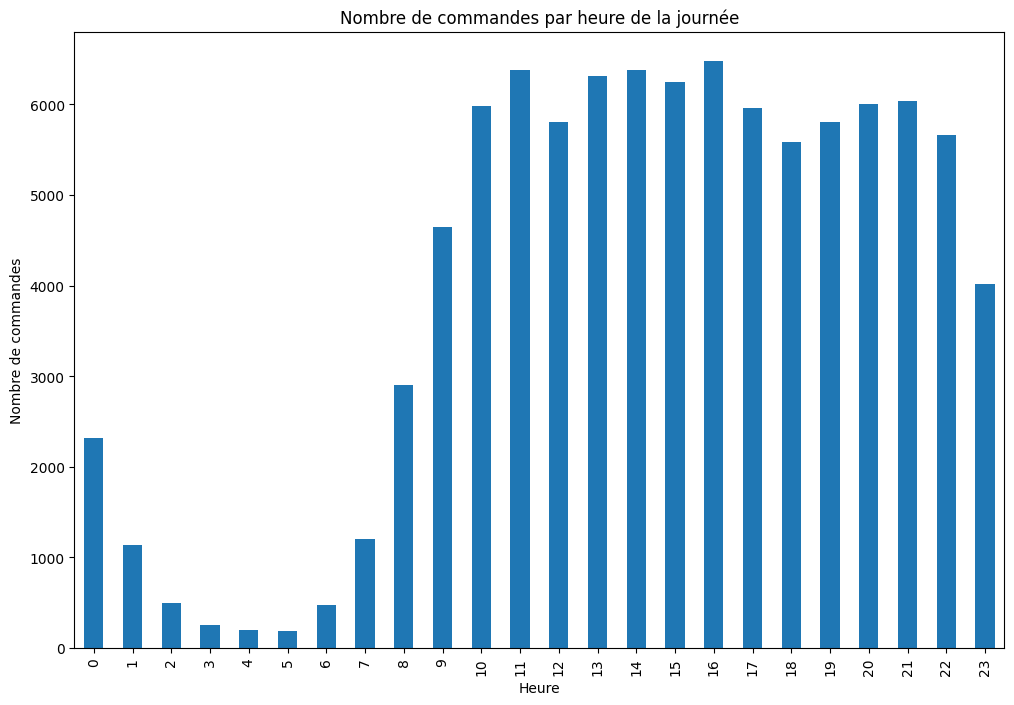

In [38]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Nombre de commandes par heure de la journée",
          ylabel="Nombre de commandes",
          xlabel="Heure",
          legend=False)
plt.show()

Aux heures du jour, le nombre de commandes est assez équitablement réparti.

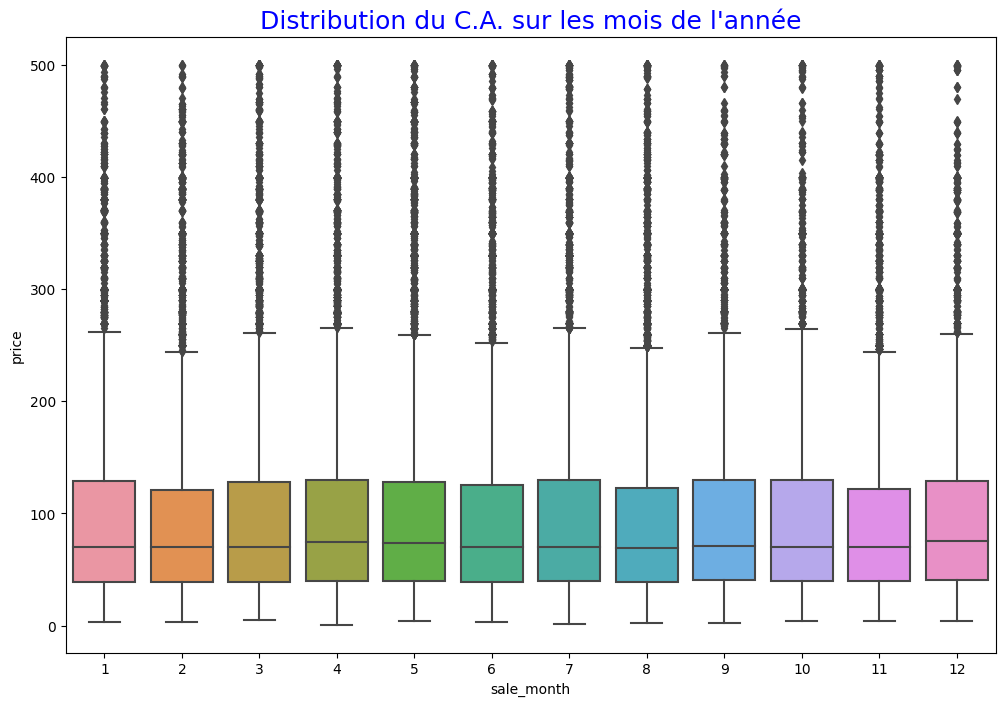

In [39]:
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

#### Création des colonnes duration_delivery et difference_real_estimated_delivery

Feature engineering: on crée la colonne **duration_delivery** qui calcule le nombre de jours entre la date d'achat et la date effective de livraison.

In [40]:
order_items["duration_delivery"] = (order_items.order_delivered_customer_date
                               - order_items.order_purchase_timestamp)\
                              .dt.round('1d').dt.days
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,sale_month,duration_delivery
111268,fcc6295008b84fe0ae2717cf4fb011ca,2,f3d786d97bcacbff8312cf48b52a6062,33cbda8716511e27e556dff9d8418bf2,45.90,17.19,bc9a74ee219462270870472b5ee3429e,delivered,2017-04-18 18:31:48,2017-05-04 15:43:45,2017-05-12,4,16.0
86552,c496bc3178d477c1390f52393d78d723,1,36876fa11e21f66fcbe91abde34210c5,af3ef48d0e13835e529c29ac573c63e5,69.20,12.92,fbbca623fd2ed0a30fd87061b46980d5,delivered,2018-05-16 08:11:59,2018-05-22 13:03:03,2018-05-30,5,6.0
41717,5f19271c1eb0a8eb0a1efed995df752b,3,1bfb290d7273a442c874dbe74b4abae6,7c67e1448b00f6e969d365cea6b010ab,69.99,23.20,0551b1b0b246b2433f94f989661aea95,delivered,2018-06-26 16:28:03,2018-07-06 12:34:40,2018-07-24,6,10.0
100886,e4bf4cf0817d499ec9e8807b121129f7,1,edfbb2566914ddd223d3bd6fa1e9693c,8444e55c1f13cd5c179851e5ca5ebd00,339.20,15.39,aa154dbe6fa58ff5b8dc04278934f841,delivered,2017-07-17 15:13:35,2017-07-29 13:03:19,2017-08-22,7,12.0
9022,149e55a5e2cbc1bcdaa30bae10dd2c5a,1,98e70aafc39bd58a8a9c4f27593831db,7d76b645482be4a332374e8223836592,14.99,12.79,d712ad728a3beefc416b69243c3a1ed8,delivered,2018-05-07 13:19:03,2018-05-14 20:28:48,2018-05-23,5,7.0


Feature engineering: on crée la colonne **difference_real_estimated_delivery** qui calcule la différence entre le délai de livraison estimé et le délai de livraison réel.

In [41]:
order_items["difference_real_estimated_delivery"] = (order_items.order_delivered_customer_date
                               - order_items.order_estimated_delivery_date)\
                              .dt.round('1d').dt.days
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,sale_month,duration_delivery,difference_real_estimated_delivery
60783,8a8b1b373a33b3d5721b9e7c02a068f9,1,acc78c9d340dbe682491c9d31ea7e187,7ea5bfa6c340f58f8e71fc1f0412b0d6,149.99,9.61,c7675af0f038a858a108d39665c1e532,delivered,2018-02-19 17:24:19,2018-02-26 22:56:57,2018-03-05,2,7.0,-6.0
42366,607e1a17f3e649f24abe13bb0dd25abe,2,37eab73447adec63c01f2cebf76afd9e,e9779976487b77c6d4ac45f75ec7afe9,21.00,18.23,d2b9844cccc9747ba112cae367d1a551,delivered,2018-05-17 02:28:51,2018-05-22 17:24:33,2018-06-21,5,6.0,-29.0
84656,c05cb9c2c6907494337ded1d059cbc7d,1,5b6263339240fc2b980849790e450c70,1b4c3a6f53068f0b6944d2d005c9fc89,29.90,20.72,15e4fb3182251c06c80f9cdc5014df1e,delivered,2017-11-26 12:29:17,2017-12-07 20:21:35,2017-12-22,11,11.0,-14.0
10239,177a359958777d9b5cebb4257016c35c,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,149.90,25.18,6326db5a7fa1bed7b29c5a8c08a3d4c9,delivered,2018-05-30 23:33:44,2018-06-06 21:07:03,2018-07-11,5,7.0,-34.0
72062,a4635c4b193e740cc720feeb43e075ef,1,0354c6a8cb8961e29b70e564b93861fe,a3a38f4affed601eb87a97788c949667,34.99,15.10,1d42f8005da1b87cce3b873a4126402c,delivered,2017-08-30 11:08:13,2017-09-11 20:15:15,2017-09-22,8,12.0,-10.0


In [42]:
order_items.drop('order_estimated_delivery_date', axis=1, inplace=True)

### Satisfaction des clients : ajout du dataset order_reviews

#### Création d'une colonne reviews_number: nombre de commntaires par commande

Ajout d'une colonne **reviews_number**, nombre de commentaires textuels pour une même commande.  
On transforme review_score par la moyenne de ces review_score pour une même commande.

In [43]:
for col in ['review_comment_title', 'review_comment_message']:
    order_reviews[col] = order_reviews[col].fillna('')

order_reviews['reviews_number'] = (
    (order_reviews['review_comment_title'] != '') &
    (order_reviews['review_comment_message'] != '')
).astype(float)

goup_order_reviews = order_reviews.groupby('order_id').agg({
    'review_score': 'mean',
    'reviews_number': 'sum',
}).reset_index()

goup_order_reviews.sort_values(by='reviews_number', ascending=False).head()


,order_id,review_score,reviews_number
43683,715b8576b74d53796bcbb107a201eb55,5.0,2.0
17484,2daee070f2042c8b7a8e9fdde778a31a,5.0,2.0
77071,c7e1e46af92704b1c2e1924de96e7479,2.5,2.0
8171,1536003b9af6a526e0d02b8cd13fd2af,5.0,2.0
15286,27dc874d0fc1a19c74ec77ca706be968,5.0,2.0


In [44]:
order_items = pd.merge(order_items, goup_order_reviews,
                       how="left",
                       on="order_id")
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,duration_delivery,difference_real_estimated_delivery,review_score,reviews_number
7178,10980615138835de121262cf38488689,1,7d33844ffd50c5fb265a1e0ba03d9470,7299e27ed73d2ad986de7f7c77d919fa,69.99,12.62,8b40ebca90678b49830f04a84116370e,delivered,2018-02-02 10:52:24,2018-02-16 20:12:34,2,14.0,-12.0,5.0,0.0
89952,d09937858506b4fd15ea217ad6c16a95,1,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,49.00,17.67,53a0f4bc02cb636ef2f8a0b381e5f19e,delivered,2017-11-25 22:14:45,2018-01-02 13:48:47,11,38.0,16.0,1.0,0.0
32299,4ae2046be802b9779c96bbe988ff709c,1,dc523b958f892102fd63bb7a60fea902,c003204e1ab016dfa150abc119207b24,249.90,16.65,a484142c4117eb9e1c7d070f9536f428,delivered,2018-03-18 10:51:41,2018-03-20 20:54:37,3,2.0,-8.0,5.0,0.0
5113,0bd5590ed46f78fceed5ab73b86b8dd4,1,f66b9de04ca29b4039377a323e949dc0,119d1aef1b4144adba89163f6cd9f5d4,199.00,35.56,9ba193141c17b861884c09393ed712eb,delivered,2017-08-08 11:53:50,2017-08-10 18:17:31,8,2.0,-10.0,4.0,0.0
38593,59bc7868dd1001b0e0affabebe64b67c,1,bc23e7ab33428b722eb04acc660423ad,3d871de0142ce09b7081e2b9d1733cb1,169.00,57.85,213c7704baa0006844081034fc1f0659,delivered,2017-12-12 21:01:29,2018-01-21 14:45:08,12,40.0,11.0,2.0,0.0


In [45]:
order_items.shape

(110197, 15)

#### Répartition des scores attribués aux commandes

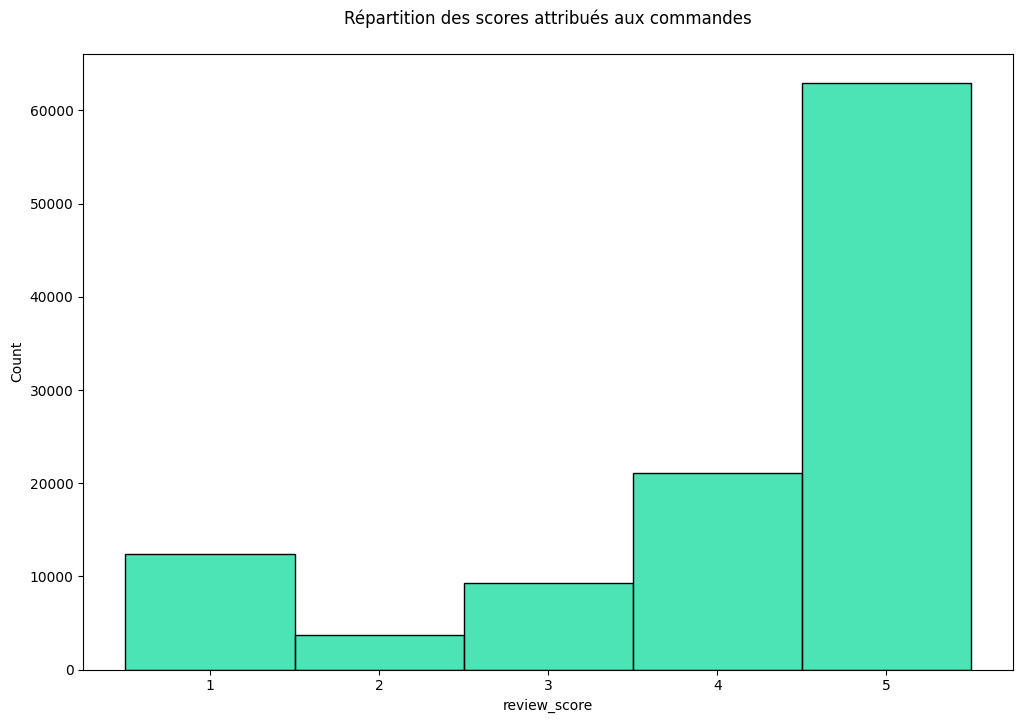

In [46]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(order_items, x="review_score", 
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.title(f"Répartition des scores attribués aux commandes\n")
plt.show()

#### Scatter plots: scores de satisfaction par rapport au temps de livraison réel, et à la différence réel - estimé

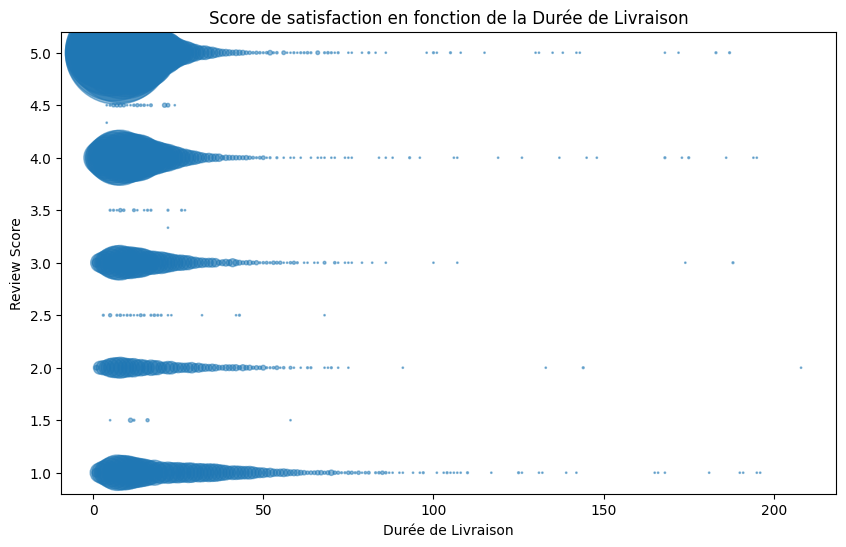

In [47]:
grouped = order_items.groupby(['duration_delivery', 'review_score']).size().reset_index(name='count')

# scatterplot avec des cercles de diamètre proportionnel au nombre de points
plt.figure(figsize=(10, 6))

plt.scatter(
    grouped['duration_delivery'], 
    grouped['review_score'], 
    s=grouped['count'],
    alpha=0.5
)

plt.title('Score de satisfaction en fonction de la Durée de Livraison')
plt.xlabel('Durée de Livraison')
plt.ylabel('Review Score')

plt.show()

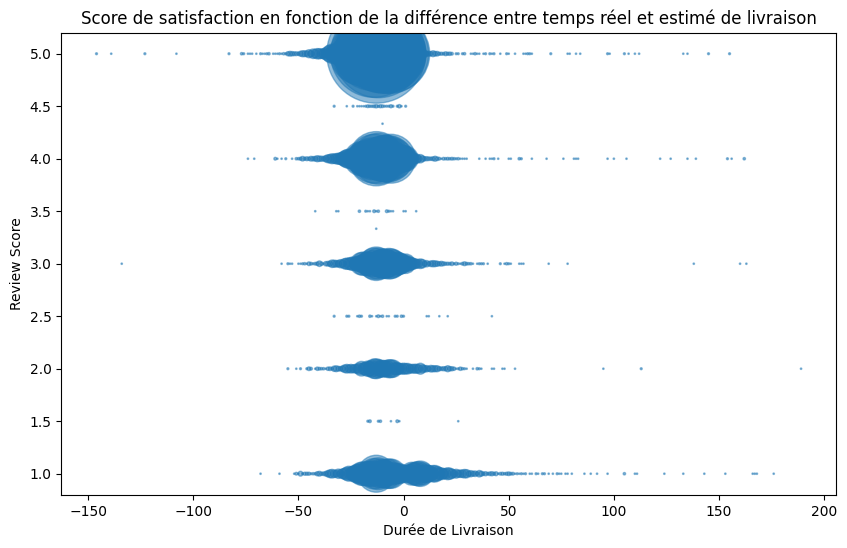

In [48]:
grouped = order_items.groupby(['difference_real_estimated_delivery', 'review_score']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))

plt.scatter(
    grouped['difference_real_estimated_delivery'], 
    grouped['review_score'], 
    s=grouped['count'],
    alpha=0.5
)

plt.title('Score de satisfaction en fonction de la différence entre temps réel et estimé de livraison')
plt.xlabel('Durée de Livraison')
plt.ylabel('Review Score')

plt.show()

### Ajout des modalités de paiement

On remplace la colonne payment_installments qui correspond actuellement au numéro de versement par le nombre total de versements pour une commande.

In [49]:
order_items = pd.merge(order_items, order_payments,
                       how="left",
                       on="order_id")

order_items.drop("payment_sequential", axis=1, inplace=True)
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,duration_delivery,difference_real_estimated_delivery,review_score,reviews_number,payment_type,payment_installments,payment_value
79583,b132ad2a1d3d44a9fe2fe6b63c406593,1,7efd7d1a1a985eae9fecdb134fd657d3,a673821011d0cec28146ea42f5ab767f,69.90,9.34,bf95f6cb7e9395f311cf318041fd0bd2,delivered,2017-08-15 18:24:02,2017-08-31 20:29:56,8,16.0,0.0,3.0,0.0,credit_card,7.0,79.24
94346,d17ebef6117650c283479ff4dca49c6f,2,b71ed32edb9ce4684e10a11309011b60,5a93f3ab0ef4c84ed5e1b5dbf23978bc,10.00,15.10,05e86ce92eb1b627c2296627078d237c,delivered,2017-07-20 12:00:22,2017-07-31 19:03:53,7,11.0,-20.0,5.0,0.0,credit_card,5.0,50.20
102355,e339c040755b354d17a122b68617cb4f,1,675dbd52c3dadeafa9a8c96ea5a9bfc6,9e6229250fedbe05838fef417b74e7fb,149.90,27.35,511a4d0fd15ef186a3103e38ef910563,delivered,2018-08-16 11:54:27,2018-08-28 00:12:31,8,12.0,-21.0,4.0,0.0,credit_card,7.0,177.25
51886,733382d1468823c8be556d7aa233e8da,1,72172e982e8b92155069e4201c92c0bb,e9779976487b77c6d4ac45f75ec7afe9,37.49,9.27,f0110bd48b4ad1321c9a097547e2ab32,delivered,2017-10-05 17:50:00,2017-10-11 13:06:29,10,6.0,-11.0,3.0,0.0,credit_card,4.0,46.76
64183,8f4235528e51aeb039cdf73bc049c7e1,1,2ffdf10e724b958c0f7ea69e97d32f64,4869f7a5dfa277a7dca6462dcf3b52b2,224.90,16.32,058f0f800afc323b17c63576ee96b0a8,delivered,2018-02-28 17:02:40,2018-04-16 18:03:44,2,47.0,26.0,1.0,0.0,credit_card,8.0,241.22


In [50]:
order_items.shape

(115038, 18)

#### Répartitions des moyens de paiement par commande 

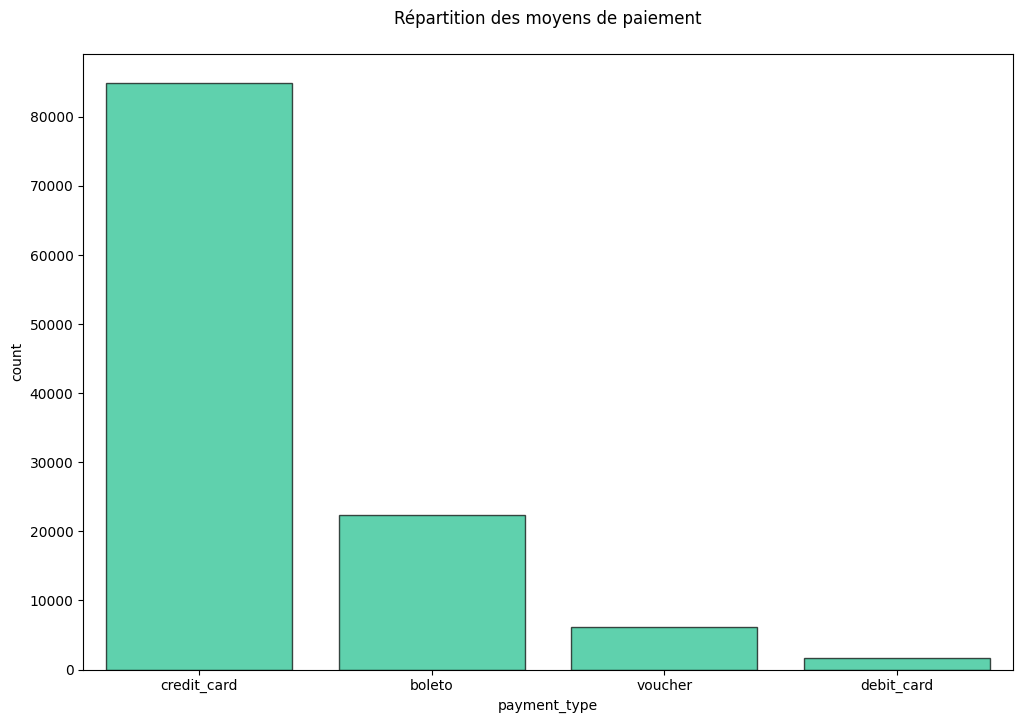

In [51]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(order_items, x="payment_type",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.title(f"Répartition des moyens de paiement\n")
plt.show()

boleto: document de paiement sous forme de code barre populaire au Brésil  
voucher: bon d'achat

In [52]:
from sklearn.preprocessing import OneHotEncoder

payment_type_data = order_items[['payment_type']]

# Initialisation de l'encodeur
onehot_encoder = OneHotEncoder(sparse=False)

# Adaptation et transformation des données
payment_type_encoded = onehot_encoder.fit_transform(payment_type_data)
encoded_columns = onehot_encoder.get_feature_names_out(['payment_type'])

payment_type_encoded_df = pd.DataFrame(payment_type_encoded, columns=encoded_columns)

order_items = pd.concat([order_items, payment_type_encoded_df], axis=1)
order_items.drop('payment_type', axis=1, inplace=True)

order_items.shape

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(115038, 22)

In [53]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'sale_month', 'duration_delivery', 'difference_real_estimated_delivery',
       'review_score', 'reviews_number', 'payment_installments',
       'payment_value', 'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher', 'payment_type_nan'],
      dtype='object')

In [54]:
order_items[['payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher', 'payment_type_nan']].sample(5)

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_nan
55143,1.0,0.0,0.0,0.0,0.0
10031,0.0,1.0,0.0,0.0,0.0
19379,0.0,1.0,0.0,0.0,0.0
67126,0.0,1.0,0.0,0.0,0.0
35496,0.0,1.0,0.0,0.0,0.0


### Ajout des produits

#### Jointure avec la traduction en anglais des types de produits

In [55]:
products = pd.merge(products, product_category_name_translation,
                    how="left",
                    on="product_category_name")
products.drop("product_category_name", axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.sample(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
8793,962f5772bee158b6fa65e4112823c598,50.0,1266.0,1.0,4450.0,20.0,20.0,20.0,health_beauty
5899,489ae2aa008f021502940f251d4cce7f,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
16548,14d8c1bbd5f367608c37522e99c47258,16.0,276.0,1.0,150.0,28.0,2.0,19.0,books_general_interest
6417,c5de3a869922e74a2bf19a543f4ac55b,58.0,1281.0,1.0,2220.0,54.0,10.0,11.0,construction_tools_construction
17932,10cb4574e88302b21a629d95fe74c54f,59.0,345.0,6.0,4950.0,56.0,12.0,40.0,bed_bath_table


#### Distribution des catégories de produits

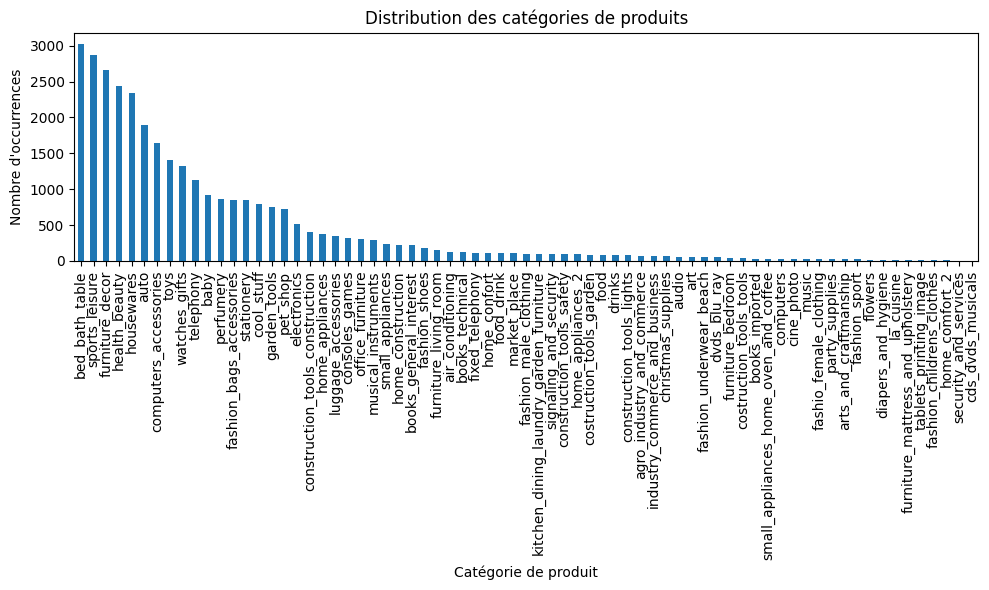

In [56]:
products_counts = products["product_category_name"].value_counts()

plt.figure(figsize=(10, 6))
products_counts.plot(kind="bar")
plt.title("Distribution des catégories de produits")
plt.xlabel("Catégorie de produit")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Jointure avec le dataset products

In [57]:
products_subset = products[['product_id', 'product_category_name']]

order_items = pd.merge(order_items, products_subset, on='product_id', how='left')
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,review_score,reviews_number,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_nan,product_category_name
61830,89b939af6aada7003d4d2930b87d8b68,2,dc58d5459e21851dd9acdfc10a621159,4992e76a42cb3aad7a7047e0d3d7e729,34.90,14.10,650dd9e8340ce0d99ea8bcddb610c529,delivered,2017-09-10 23:03:19,2017-09-14 22:21:57,...,4.0,0.0,4.0,98.00,0.0,1.0,0.0,0.0,0.0,housewares
114514,fedcd9f7ccdc8cba3a18defedd1a5547,1,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,79.99,22.88,13aa59158da63ba0e93ec6ac2c07aacb,delivered,2017-09-23 14:56:45,2017-10-18 22:35:50,...,5.0,0.0,1.0,9.76,0.0,0.0,0.0,1.0,0.0,office_furniture
43948,61b73d6deb118dad91fa0cca4365e4dd,1,1264d5ede085c34d455f62cceca87791,d379f449f2a3b271bc01c0782020f705,39.90,17.60,a8fb590bc25c544e61460926ab10a3c0,delivered,2018-01-25 10:42:59,2018-02-01 00:45:01,...,5.0,0.0,1.0,16.04,0.0,0.0,0.0,1.0,0.0,furniture_decor
102346,e3352388edfd888eea554ed3c10eaef0,1,c9fa6a0dbc5b979d8c99f38c3c9c912f,9f505651f4a6abe901a56cdc21508025,17.99,7.78,22e3f291b6673ef19eb92086a28cdba9,delivered,2017-12-26 13:18:26,2017-12-27 16:51:50,...,5.0,0.0,1.0,25.77,0.0,1.0,0.0,0.0,0.0,consoles_games
6644,0ec76bccb5366815ac1be29b90db03c7,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,16.01,376085f5d0619f4cc1ea6cc1eb6663d6,delivered,2018-03-02 19:33:49,2018-03-29 21:58:54,...,5.0,0.0,2.0,196.01,0.0,1.0,0.0,0.0,0.0,computers_accessories


In [58]:
pd.set_option('display.max_rows', None)
product_types = order_items['product_category_name'].value_counts()
product_types

product_category_name
bed_bath_table                             11650
health_beauty                               9762
sports_leisure                              8733
furniture_decor                             8557
computers_accessories                       7898
housewares                                  7172
watches_gifts                               6065
telephony                                   4603
garden_tools                                4464
auto                                        4284
toys                                        4185
cool_stuff                                  3907
perfumery                                   3478
baby                                        3112
electronics                                 2807
stationery                                  2564
fashion_bags_accessories                    2105
pet_shop                                    2005
office_furniture                            1753
luggage_accessories                         114

In [59]:
pd.reset_option('display.max_rows')

#### Feature engineering: simplification des types de produits

In [60]:
order_items['product_category'] = np.where((order_items['product_category_name'].str.contains("sport")==True),
                                    'sport',
                                    np.where((order_items['product_category_name'].str.contains("art")==True),
                                    'art',
                                    np.where((order_items['product_category_name'].str.contains("pet_shop")==True),
                                    'pets',
                                    np.where((order_items['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                                    np.where((order_items['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                                    np.where((order_items['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                                    np.where((order_items['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                                    np.where((order_items['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                                    np.where((order_items['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                                    np.where((order_items['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                                    np.where((order_items['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                                     np.where((order_items['product_category_name'].str.contains("construction")==True),
                                     'diy_garden_auto',
                                     'other'))))))))))))

In [61]:
order_items.drop('product_category_name', axis=1, inplace=True)

In [62]:
order_items.shape

(115038, 23)

In [63]:
product_types = order_items['product_category'].value_counts()
product_types

product_category
home_furniture                  37719
technology                      17011
health_beauty                   13240
other                           11283
flowers_gifts                   10005
sport                            8762
toys_baby                        7334
fashion_clothing_accessories     3852
pets                             2005
diy_garden_auto                  1435
groceries_food_drink             1161
books_cds_media                   955
art                               276
Name: count, dtype: int64

#### Répartition des catégories de produits

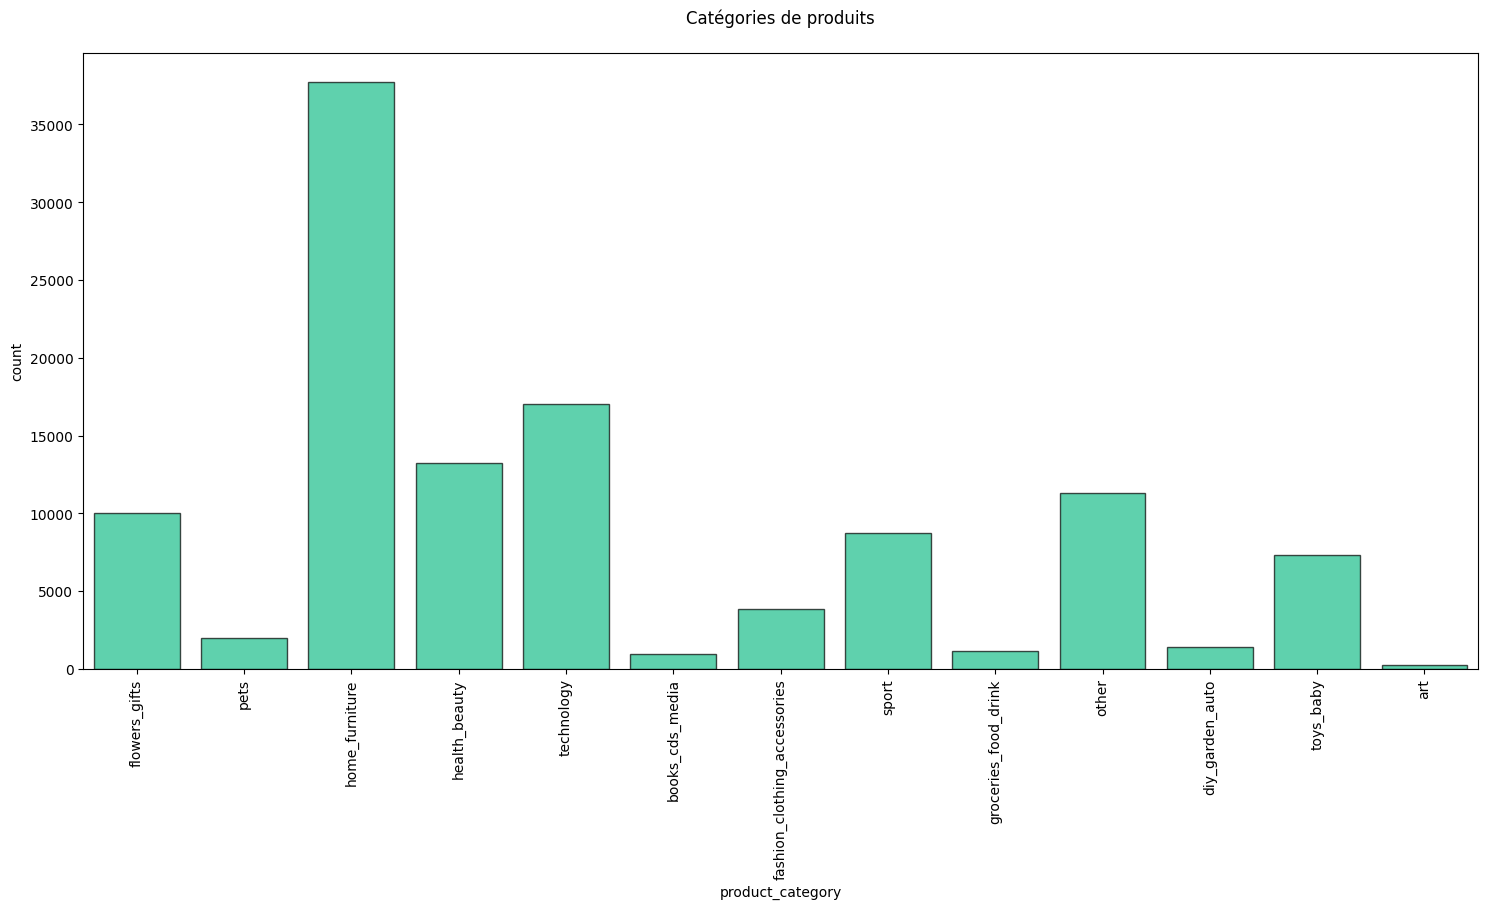

In [64]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(order_items, x="product_category",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, order_items["product_category"].nunique()),
           order_items["product_category"].unique(),
           rotation=90)
plt.title(f"Catégories de produits\n")
plt.show()

Les colonnes suivantes ne nous serviront pas pour la modélisation K-Means qui n'est pas adaptée pour les features catégorielles.

In [65]:
order_items.drop(['payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher', 'payment_type_nan'], axis=1, inplace=True)

### Ajout des localisations

#### Jointure avec le dataset customers

In [66]:
customers_subset = customers[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_state']]

order_items = pd.merge(order_items, customers_subset, on='customer_id', how='left')
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,duration_delivery,difference_real_estimated_delivery,review_score,reviews_number,payment_installments,payment_value,product_category,customer_unique_id,customer_zip_code_prefix,customer_state
7239,1017e188d93cee2c3292c71a98dbec38,1,8d23da47a7828cf786103f1c3fbeab43,004c9cd9d87a3c30c522c48c4fc07416,143.99,21.09,861728f9a0d9bfa588e238e30a20e278,delivered,2017-04-20 17:17:29,2017-05-03 12:36:30,...,13.0,-12.0,5.0,0.0,5.0,97.46,home_furniture,d01e34f5bfc7a0f5102b962efd522981,88503,SC
86516,c064d2ccc74eafa9f92b6e742708b48c,2,297b52b57d258e1a40202d4f9fb7e38a,620c87c171fb2a6dd6e8bb4dec959fc6,29.90,18.23,27e703f1e927f1651f5fccdd365cd3e0,delivered,2018-05-11 10:49:25,2018-06-04 21:22:47,...,24.0,6.0,2.0,0.0,2.0,96.26,health_beauty,0d27736889ec9fe9aee055fd301ae784,31525,MG
24251,36181ce9f0459af55f5aae302b4b13a8,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,325.00,10.04,5f82b6799f7f5bda22833caafe7e8cd2,delivered,2018-03-12 19:37:14,2018-03-15 20:03:14,...,3.0,-6.0,5.0,0.0,3.0,335.04,health_beauty,69173628c3f6d1c28d6285dfdf9f5dcc,5509,SP
63412,8d7de30c33f737a080cdd433ec8670e4,1,a963ea4d494221de09b70f1b4a70edbd,bd0389da23d89b726abf911cccc54596,89.90,17.34,0b95e76c8ededa5139d9f8b5eed8f904,delivered,2018-04-04 08:14:06,2018-04-14 12:21:35,...,10.0,-10.0,4.0,0.0,1.0,107.24,technology,9571fc1b978dab6e1f488d52855ef622,13276,SP
60017,85a08640d88815b0ede472adb059d337,1,3f0376e782caf27ef19342d8e5c7e6f5,8b321bb669392f5163d04c59e235e066,15.00,7.39,72fbca98280bcd9d6131e02416d992f0,delivered,2018-06-29 08:25:50,2018-07-05 21:36:20,...,7.0,-7.0,4.0,0.0,2.0,22.39,technology,2aa8d8ed84f5c0b179efdc88fdd6ceb3,5351,SP


In [67]:
order_items.shape

(115038, 21)

In [68]:
geoloc = geolocation[['geolocation_zip_code_prefix','geolocation_lng', 'geolocation_lat']]
geoloc.columns = ['customer_zip_code_prefix', 'customer_lng', 'customer_lat']

duplicates = geoloc[geoloc.duplicated(subset='customer_zip_code_prefix')]
print(duplicates)

         customer_zip_code_prefix  customer_lng  customer_lat
2                            1046    -46.642951    -23.546129
10                           1013    -46.634184    -23.547325
13                           1012    -46.634671    -23.548946
14                           1037    -46.637855    -23.545187
15                           1046    -46.644820    -23.546081
...                           ...           ...           ...
1000158                     99950    -52.010705    -28.068639
1000159                     99900    -52.224882    -27.877125
1000160                     99950    -52.014716    -28.071855
1000161                     99980    -51.846871    -28.388932
1000162                     99950    -52.018658    -28.070104

[981148 rows x 3 columns]


In [69]:
geoloc_mean = geoloc.groupby('customer_zip_code_prefix').mean().reset_index()
order_items = pd.merge(order_items, geoloc_mean,
                       how="left",
                       on="customer_zip_code_prefix")

In [70]:
order_items.shape

(115038, 23)

#### Jointure avec le dataset sellers

In [71]:
sellers_subset = sellers[['seller_id', 'seller_zip_code_prefix', 'seller_state']]
order_items = pd.merge(order_items, sellers_subset, on='seller_id', how='left')

In [72]:
geoloc.columns = ['seller_zip_code_prefix', 'seller_lng', 'seller_lat']
geoloc_mean = geoloc.groupby('seller_zip_code_prefix').mean().reset_index()
order_items = pd.merge(order_items, geoloc_mean,
                       how="left",
                       on="seller_zip_code_prefix")

#### Distance Haversine entre le vendeur et l'acheteur

Text(0.5, 0.98, 'Distribution des distances entre client et vendeur')

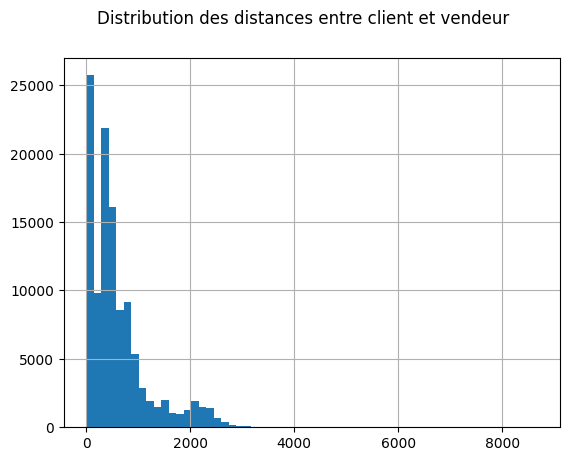

In [73]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


def distance_client_vendeur(df):
    return haversine_np(df['customer_lng'], df['customer_lat'],
                        df['seller_lng'], df['seller_lat'])


order_items['distance_km'] = distance_client_vendeur(order_items)
order_items['distance_km'].hist(bins=60)
plt.suptitle('Distribution des distances entre client et vendeur')

In [74]:
missing_values = order_items.isna().sum()
print(missing_values)

order_id                                0
order_item_id                           0
product_id                              0
seller_id                               0
price                                   0
freight_value                           0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_delivered_customer_date           8
sale_month                              0
duration_delivery                       8
difference_real_estimated_delivery      8
review_score                          861
reviews_number                        861
payment_installments                    3
payment_value                           3
product_category                        0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_state                          0
customer_lng                          298
customer_lat                          298
seller_zip_code_prefix            

In [75]:
order_items_cleaned = order_items.dropna()
order_items_cleaned.shape

(113613, 28)

In [76]:
missing_values = order_items_cleaned.isna().sum()

### Récence, Fréquence, Montant

Un customer_unique_id peut avoir plusieurs customer_id, un à chaque commande.  
La fréquence sera calculée avec le count de customer_id.  
Pour la récence, on prendra comme référence la date du tout dernier achat du dataset.  
Le montant total sur la période du dataset sera calculée avec la somme de payment_value.  
Dans le cadre de la RFMS, la satisfaction sera calculée avec la moyenne du review_score.  

In [77]:
clients = order_items_cleaned.groupby("customer_unique_id").agg({
    'order_purchase_timestamp': 'max',
    'customer_id': 'count',
    'payment_value': 'sum',
    'review_score': 'mean'
})

last_date = order_items_cleaned['order_delivered_customer_date'].max()

clients.columns = ['dernier_achat', 'Frequence', 'Montant', 'Satisfaction']
clients['Recence'] = (last_date - clients['dernier_achat']).dt.days
clients.sort_values(by='Frequence', ascending=False).head()

,dernier_achat,Frequence,Montant,Satisfaction,Recence
customer_unique_id,,,,,
9a736b248f67d166d2fbb006bcb877c3,2017-08-08 20:26:31,75,556.13,5.000000,434
6fbc7cdadbb522125f4b27ae9dee4060,2017-09-23 14:56:45,38,411.48,5.000000,388
f9ae226291893fda10af7965268fb7f6,2017-03-11 18:34:44,35,946.47,3.685714,584
569aa12b73b5f7edeaa6f2a01603e381,2017-06-07 12:05:10,26,62.68,5.000000,497
85963fd37bfd387aa6d915d8a1065486,2018-02-14 16:34:27,24,1758.88,5.000000,244


In [78]:
def most_frequent(x):
    if not x.empty:
        return x.value_counts().index[0]
    else:
        return None  


clients_agg = order_items_cleaned.groupby('customer_unique_id').agg(
    delivery_days=('duration_delivery', 'mean'),
    delivery_error_days=('difference_real_estimated_delivery', 'mean'),
    favourite_category=('product_category', most_frequent),
    favourite_month=('sale_month', most_frequent),
    customer_state=('customer_state', most_frequent),
    distance_customer_seller=('distance_km', 'mean'),
    freight_value=('freight_value', 'mean')
)

clients = (clients
               .join(clients_agg, how='left')
               )

clients.sample(5)

,dernier_achat,Frequence,Montant,Satisfaction,Recence,delivery_days,delivery_error_days,favourite_category,favourite_month,customer_state,distance_customer_seller,freight_value
customer_unique_id,,,,,,,,,,,,
8bc6490faac5eb5d8698443dad129f2f,2018-05-18 13:35:18,2,256.12,5.0,151,6.0,-13.0,home_furniture,5,SP,461.838190,10.13
de4ebdb29ae674d7576e5bdc19a0a828,2018-02-03 13:07:28,2,830.28,5.0,256,15.0,-17.0,sport,2,DF,530.625761,18.57
d7b021ab5ecb5f1e3a1fa8ed4a65783b,2018-03-09 18:05:10,1,94.43,4.0,221,12.0,-20.0,technology,3,RJ,354.055427,15.43
af361e6472bebb98baf67b62201f9abb,2018-05-26 13:12:31,2,253.68,4.0,144,14.0,-31.0,home_furniture,5,SC,780.879746,13.52
0048a779a98a7848514096ff04046079,2018-08-08 12:22:24,1,41.04,5.0,70,6.0,-7.0,home_furniture,8,MG,413.522152,19.34


In [79]:
clients.sample(5)

,dernier_achat,Frequence,Montant,Satisfaction,Recence,delivery_days,delivery_error_days,favourite_category,favourite_month,customer_state,distance_customer_seller,freight_value
customer_unique_id,,,,,,,,,,,,
53dad0f86e33e3e263658b3484563365,2018-01-09 20:39:23,1,86.24,5.0,280,10.0,-27.0,toys_baby,1,MS,640.386524,16.25
27e93c3b54ba3fa1966bf7d23e01c58d,2017-09-14 11:40:08,1,53.09,4.0,398,20.0,2.0,technology,9,RJ,338.501749,14.10
397567bb88c56e494c4b4173b676266e,2018-08-21 11:21:23,1,162.12,5.0,57,7.0,-8.0,health_beauty,8,PE,1126.587966,39.13
ed33f787f6431b04641f53e575b2648c,2018-04-04 21:53:53,2,287.12,5.0,195,7.0,-4.0,home_furniture,4,SP,24.471444,8.88
fc0bcca3d8d90a812b707bb8e45069d6,2018-06-02 18:37:14,1,44.63,4.0,136,137.0,97.0,home_furniture,6,ES,856.001918,18.23


In [80]:
clients.to_csv('olist/clients.csv')